In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/sri03/Downloads/archive (7).zip")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

C:\Users\sri03\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sri03\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sri03\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sentiment', ylabel='count'>

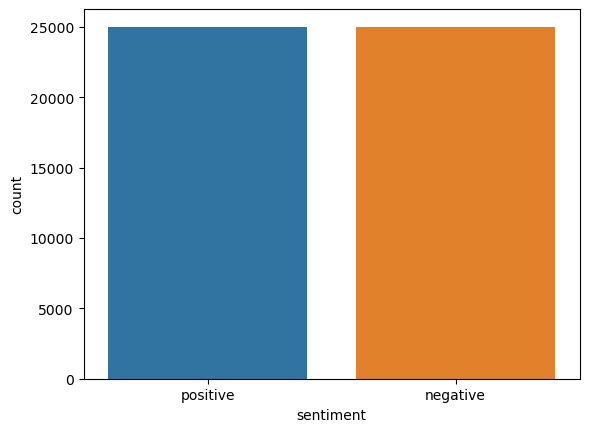

In [6]:
sns.countplot(x=df['sentiment'])

C:\Users\sri03\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sri03\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


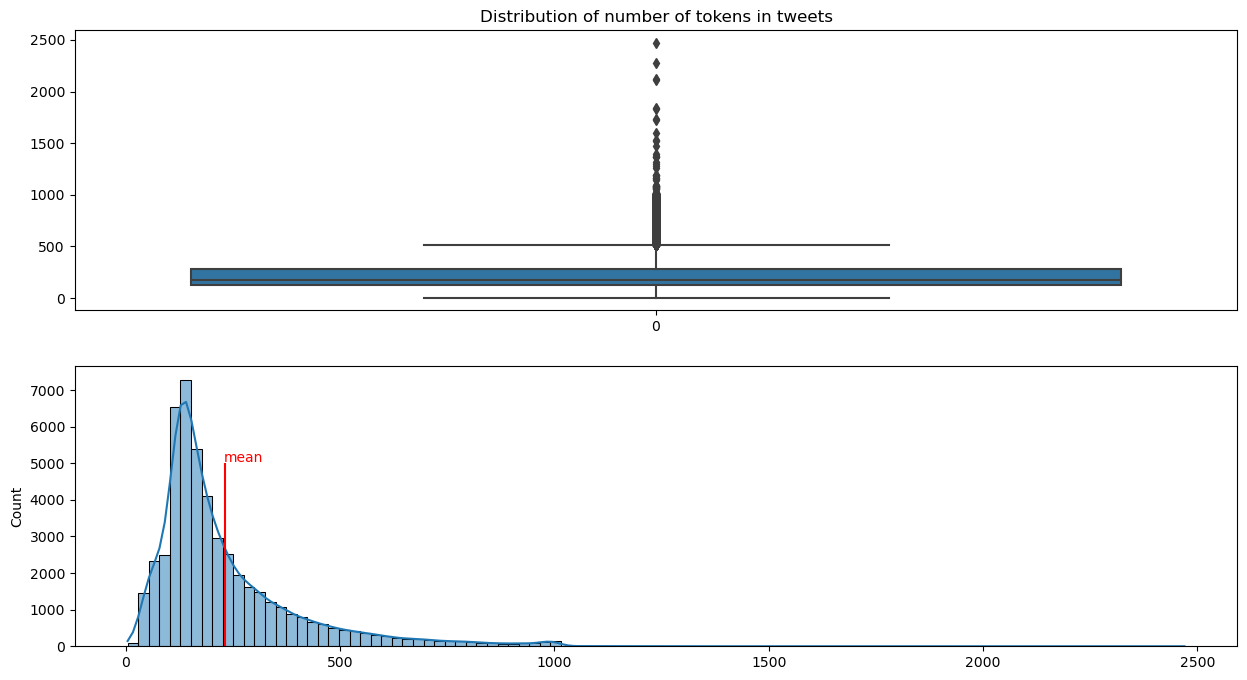

In [7]:
texts=df['review']
text_lens=[len(t.split()) for t in texts.values]
len_mean=np.mean(text_lens)
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(text_lens, ax=axes[0])
sns.histplot(text_lens, bins=100, kde=True, ax=axes[1])
axes[1].vlines(len_mean, 0, 5000, color = 'r')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),
            color='r')
plt.show()

In [8]:
extreme_outliers=df['review'][np.array(text_lens)>2000]

In [9]:
for idx in extreme_outliers.index:
    print(idx, 'Target', df['sentiment'][idx])
    print(extreme_outliers[idx])
    print('=-=-=-=-=-=-=-=-'*4, '\n')

31240 Target positive
(Some spoilers included:)<br /><br />Although, many commentators have called this film surreal, the term fits poorly here. To quote from Encyclopedia Britannica's, surreal means:<br /><br />"Fantastic or incongruous imagery": One needn't explain to the unimaginative how many ways a plucky ten-year-old boy at large and seeking his fortune in the driver's seat of a red Mustang could be fantastic: those curious might read James Kincaid; but if you asked said lad how he were incongruous behind the wheel of a sports car, he'd surely protest, "NO way!" What fantasies and incongruities the film offers mostly appear within the first fifteen minutes. Thereafter we get more iterations of the same, in an ever-cruder and more squalid progression that, far from incongruous, soon proves predictable. Not that it were, on the other hand, literally believable-- but it were unfair to tax Motorama in particular with this flaw, any plausible suspension of disbelief having fallen prec

In [10]:
positive_corpus=' '.join(df['review'][df['sentiment']=='positive'])
negative_corpus=' '.join(df['review'][df['sentiment']=='negative'])

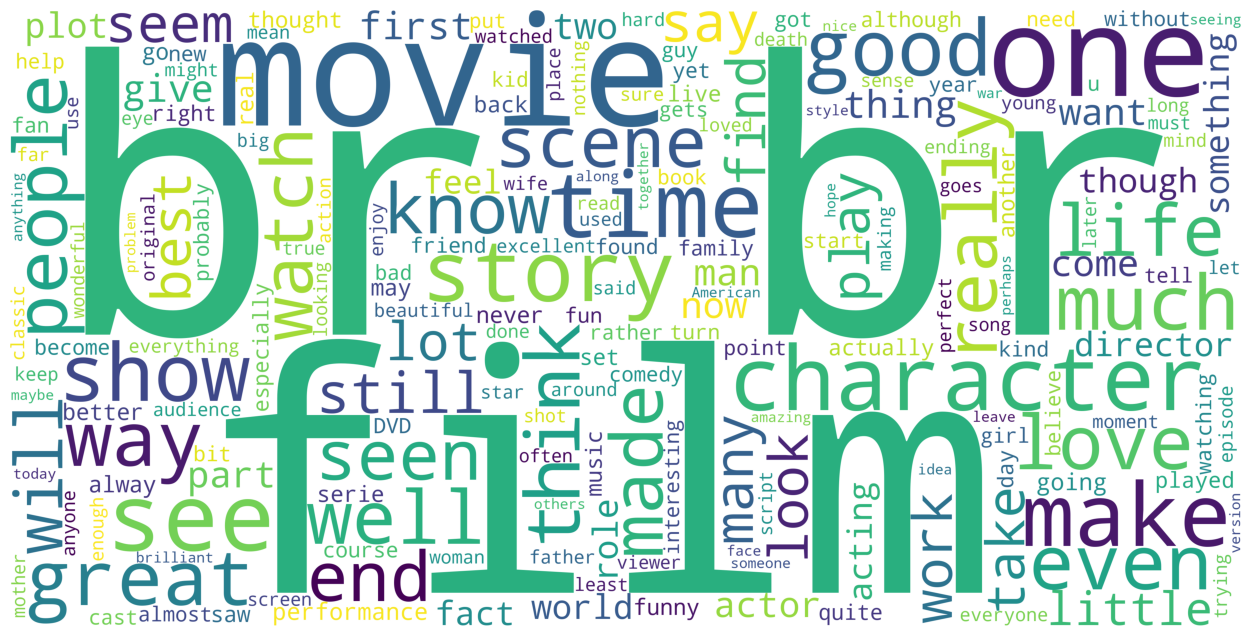

In [11]:
positive_cloud=WordCloud(stopwords=STOPWORDS,background_color='white',height=2000,width=4000).generate(positive_corpus)
plt.figure(figsize=[16,8])
plt.imshow(positive_cloud)
plt.axis("off")
plt.show()

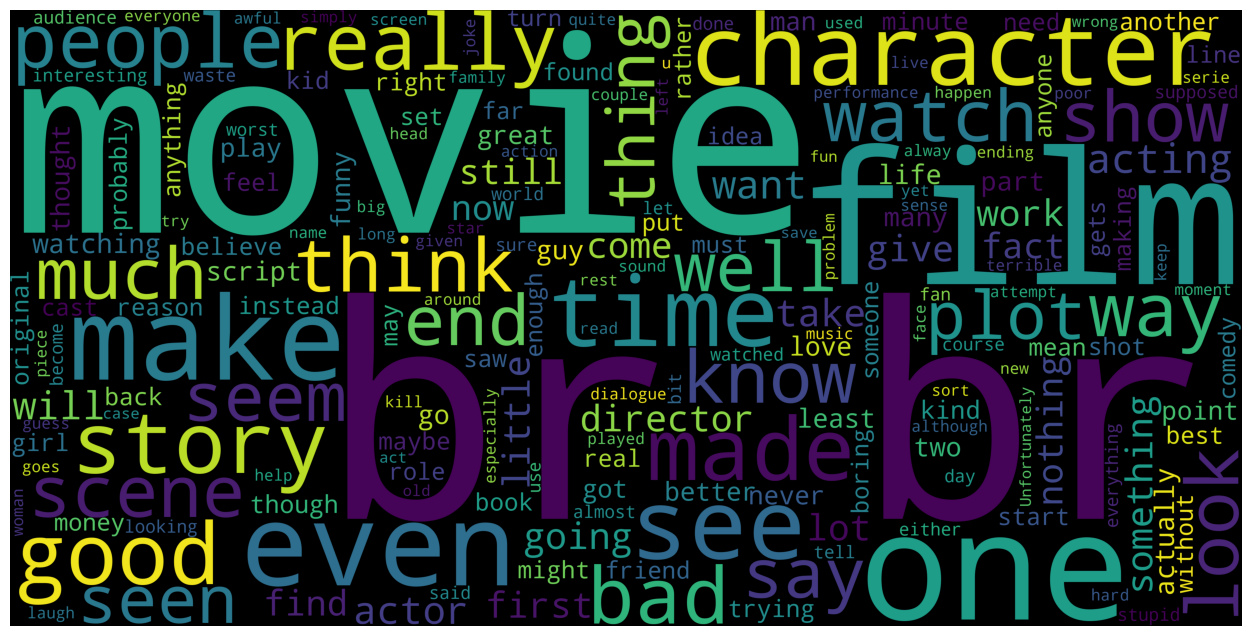

In [12]:
negative_cloud=WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(negative_corpus)
plt.figure(figsize=[16,8])
plt.imshow(negative_cloud)
plt.axis("off")
plt.show()

In [13]:
import re

def find_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

In [14]:
from collections import Counter
emojis=[]
for t in df['review']:
    emojis.append(len(find_emojis(t))>0)
    if len(find_emojis(t))>0:
        print(find_emojis(t))
print(Counter(emojis))

['▼', '▼']
['★★']
['，', '、', '、', '、', '，', '、', '、']
['\uf0b7', '\uf0b7', '\uf0b7', '\uf0b7', '\uf0b7', '\uf0b7', '\uf0b7']
Counter({False: 49996, True: 4})


In [15]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from spacy.lang.en import English
import spacy
import re
import nltk
from tqdm import tqdm
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
nlp=spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sri03\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stopwords.update(["<br />"])

In [18]:
stopwords

{'<br />',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',


In [19]:
import re

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE)
    return emoj.sub(r'', data)

In [20]:
class Preprocessor:
    def __init__(self, stopwords=stopwords):
        self.vectorizer = TfidfVectorizer(lowercase=False, max_features=8000,
                                         min_df=10, ngram_range=(1, 3),
                                         tokenizer=None)
        self.stopwords = stopwords
        self.vectorizer_fitted = False
        
    def remove_urls(self, texts):
        print('Removing URLs...')
        pattern = re.compile('(\w+\.com ?/ ?.+)|(http\S+)')
        return [re.sub(pattern, '', text) for text in texts]
    
    def remove_double_space(self, texts):
        print('Removing double space...')
        pattern = re.compile(' +')
        return [re.sub(pattern, ' ', text) for text in texts]
    def remove_punctuation(self, texts):
        print('Removing Punctuation...')
        pattern = re.compile('[^a-z ]')
        return [re.sub(pattern, ' ', text) for text in texts]
    
    def remove_stopwords(self, texts):
        print('Removing stopwords...')
        return [[w for w in text.split(' ') if w not in self.stopwords] for text in tqdm(texts)]
    
    def remove_numbers(self, texts):
        print('Removing numbers...')
        return [' '.join([w for w in text if not w.isdigit()]) for text in tqdm(texts)]
    
    def remove_emojis(self, texts):
        print('Removing emojis...')
        return [remove_emoji(text) for text in texts] 
    
    def lemmatize(self, texts):
        print('Lemmatizing...')
        lemmatized_texts = []
        for text in tqdm(texts):
            doc = nlp(text)
            lemmatized_texts.append(' '.join([token.lemma_ for token in doc]))
                                    
        return lemmatized_texts
        
    def transform(self, X, y=None, mode='train'):
        X = X.copy()
        print('Removing Nans...')
        X = X[~X.isnull()]                         
        X = X[~X.duplicated()]                      
        
        if mode == 'train':
            self.train_idx = X.index
        else:
            self.test_idx = X.index
        print('Counting capitalized...')
        capitalized = [np.sum([t.isupper() for t in text.split()]) 
                           for text in np.array(X.values)]  # count capitalized
        # X['cap'] = capitalized
        print('Lowering...')
        X = [text.lower() for text in X]             
        X = self.remove_urls(X)                      
        X = self.remove_punctuation(X)               
        X = self.remove_double_space(X)              
        X = self.remove_emojis(X)                    
        X = self.remove_stopwords(X)                 
        X = self.remove_numbers(X)                                        
        X = self.lemmatize(X)                        
        
        if not self.vectorizer_fitted:
            self.vectorizer_fitted = True
            print('Fitting vectorizer...')
            self.vectorizer.fit(X)
            print('Vectorizing...')
        X = self.vectorizer.transform(X)             
        
        return X

In [21]:
pr=Preprocessor()

In [22]:
text_data=df['review']
y=df['sentiment'].map({'positive':0,'negative':1})

In [23]:
text_data_pr=pr.transform(text_data)
text_data_pr = pd.DataFrame.sparse.from_spmatrix(text_data_pr, columns=pr.vectorizer.get_feature_names_out())

Removing Nans...
Counting capitalized...
Lowering...
Removing URLs...
Removing Punctuation...
Removing double space...
Removing emojis...
Removing stopwords...


100%|█████████████████████████████████████████████████████████████████████████| 49582/49582 [00:02<00:00, 17149.06it/s]


Removing numbers...


100%|█████████████████████████████████████████████████████████████████████████| 49582/49582 [00:00<00:00, 73055.22it/s]


Lemmatizing...


100%|████████████████████████████████████████████████████████████████████████████| 49582/49582 [35:20<00:00, 23.38it/s]


Fitting vectorizer...
Vectorizing...


In [24]:
text_data.shape

(50000,)

In [25]:
import pickle

In [26]:
with open("C:/Users/sri03/Downloads/archive (7).zip", "wb") as f:
    pickle.dump(text_data_pr, f)

In [27]:
X=text_data_pr
X.shape

(49582, 8000)

In [28]:
y= y[y.index.isin(pr.train_idx)]
y.shape

(49582,)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
naive_bayes=MultinomialNB()
naive_bayes.fit(X_train,y_train)
y_pred=naive_bayes.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'accurcy score is {accuracy_score(y_test,y_pred)*100}')

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if array.dtypes.apply(is_sparse).all():
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if array.dtypes.apply(is_sparse).all():


[[4374  603]
 [ 767 4173]]
accurcy score is 86.18533830795604


# accurcy score is 86.18533830795604

# DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'accurcy score is {accuracy_score(y_test,y_pred)*100}')

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if array.dtypes.apply(is_sparse).all():
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\s

[[3553 1424]
 [1389 3551]]
accurcy score is 71.63456690531412


# accurcy score is 71.38247453867098

# LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
svc=LogisticRegression(n_jobs=-1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'accurcy score is {accuracy_score(y_test,y_pred)*100}')

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if array.dtypes.apply(is_sparse).all():
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if array.dtypes.apply(is_sparse).all():


[[4523  454]
 [ 620 4320]]
accurcy score is 89.17011192901079


# accurcy score is 89.17011192901079

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [37]:
rscv=RandomizedSearchCV(svc,param_grid,cv=5,n_jobs=-1)
rscv.fit(X,y)

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Tracebac

RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [38]:
rscv.best_estimator_

LogisticRegression(C=4.281332398719396, n_jobs=-1, solver='liblinear')

In [39]:
svc=LogisticRegression(C=0.615848211066026, n_jobs=-1, solver='liblinear')

In [40]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'accurcy score is {accuracy_score(y_test,y_pred)*100}')

C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if array.dtypes.apply(is_sparse).all():
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sri03\anaconda3\Lib\site-packages\sklearn\utils\validation.py:827: Fu

[[4510  467]
 [ 643 4297]]
accurcy score is 88.80709892104467


# accurcy score is 88.82726631037612

# Keras NEURAL NETWORK

In [41]:
from keras.layers import Dense,BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [42]:
model=Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [43]:
early_stop=EarlyStopping(patience=3)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
model.fit(X.values,y,validation_split=0.2,epochs=10,callbacks=[early_stop])

Epoch 1/10
1240/1240 [==============================] - 12s 9ms/step - loss: 0.3144 - accuracy: 0.8641 - val_loss: 0.2698 - val_accuracy: 0.8895
Epoch 2/10
1240/1240 [==============================] - 11s 9ms/step - loss: 0.2246 - accuracy: 0.9126 - val_loss: 0.2814 - val_accuracy: 0.8882
Epoch 3/10
1240/1240 [==============================] - 10s 8ms/step - loss: 0.1582 - accuracy: 0.9368 - val_loss: 0.3183 - val_accuracy: 0.8806
Epoch 4/10
1240/1240 [==============================] - 10s 8ms/step - loss: 0.0984 - accuracy: 0.9620 - val_loss: 0.4298 - val_accuracy: 0.8688


In [46]:
results=model.evaluate(X_test.values,y_test)

310/310 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9631


In [47]:
print(f'accuracy score is {results[1]*100}')

accuracy score is 96.30936980247498


# accuracy score is 96.30936980247498